In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
IBMQ.load_account()

/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
matplotlib inline

In [4]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [5]:
simulator = my_provider.get_backend('ibmq_5_yorktown')

In [6]:
# Making the quantum circuit
def circuitI(gamma, beta, J, h1, h2):
    qc = QuantumCircuit(2, 2)
    qc.h([0, 1])
    qc.h(1)
    qc.cz(0,1)
    qc.rx(2*gamma*J, 1)
    qc.cz(0,1)
    qc.h(1)
    qc.i(0)
    qc.rz(2*gamma*h1, 0)
    qc.rz(2*gamma*h2, 1)
    qc.rx(2*beta, 0)
    qc.rx(2*beta, 1)
    qc.measure([0,1], [0,1])
    return qc

In [7]:
# Initializing the variables for D.
J = 1
h1 = 0
h2 = 0

#Setting the dimesions of the pasephase. The amount of simulated points = n**2
n = 61
p = np.pi/(n-1)
res = np.zeros([n, n, 4])


# Running a simulation for each point
for i in range(n):
    qc_list = []
    gamma = i*p
    for j in range(n):
        beta = j*p
        qc = circuitI(gamma, beta, J, h1, h2)       
        qc_list.append(qc)
    transpiled_circs = transpile(qc_list, backend=simulator)
    job = execute(transpiled_circs, backend = simulator, shots=1000 )
    for circ_index in range(len(transpiled_circs)):
        counts = job.result().get_counts(qc_list[circ_index])
        res[i][circ_index][:] = np.array([int(counts.get('00', 0)), int(counts.get('01', 0)), int(counts.get('10', 0)),
                            int(counts.get('11', 0))])


In [8]:
print(res)

[[[286. 244. 240. 230.]
  [252. 216. 270. 262.]
  [252. 242. 258. 248.]
  ...
  [225. 256. 284. 235.]
  [222. 256. 288. 234.]
  [265. 252. 239. 244.]]

 [[351. 213. 181. 255.]
  [270. 308. 218. 204.]
  [277. 301. 214. 208.]
  ...
  [279. 310. 203. 208.]
  [271. 300. 202. 227.]
  [316. 221. 194. 269.]]

 [[330. 198. 198. 274.]
  [293. 267. 216. 224.]
  [301. 271. 205. 223.]
  ...
  [277. 285. 215. 223.]
  [257. 277. 228. 238.]
  [322. 194. 199. 285.]]

 ...

 [[340. 186. 203. 271.]
  [269. 292. 224. 215.]
  [236. 326. 238. 200.]
  ...
  [301. 253. 177. 269.]
  [257. 302. 215. 226.]
  [340. 201. 200. 259.]]

 [[327. 184. 200. 289.]
  [267. 293. 240. 200.]
  [266. 330. 218. 186.]
  ...
  [283. 284. 211. 222.]
  [264. 308. 202. 226.]
  [342. 185. 196. 277.]]

 [[318. 226. 244. 212.]
  [251. 242. 262. 245.]
  [256. 239. 253. 252.]
  ...
  [250. 234. 267. 249.]
  [241. 245. 255. 259.]
  [272. 257. 242. 229.]]]


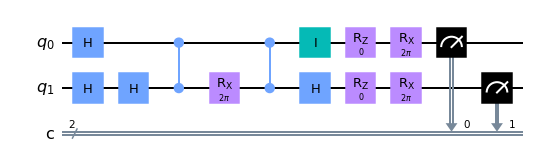

In [9]:
#Draw the current circuit
qc.draw(output='mpl')

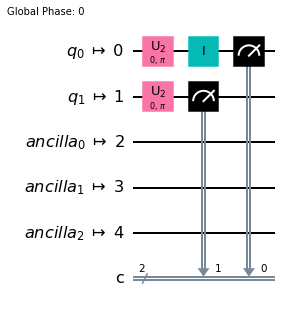

In [10]:
transpiled_circs[0].draw(output='mpl')

<AxesSubplot:>

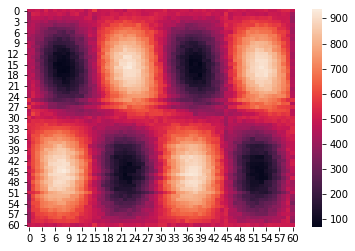

In [11]:
# Making a heatmap plot
sns.heatmap(res[:, :, 1]+res[:, :, 2])